# Interactive Time Series Visualization Assignment

In [1]:
#conda install nodejs
#!pip install plotly_express
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [2]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact
import matplotlib.pyplot as plt

### Load the Online Retail.xlsx Excel file into a Pandas dataframe.

In [3]:
df = pd.read_excel('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/Online%20Retail.xlsx', engine='openpyxl')
df.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.2,17511,United Kingdom
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.6,13408,United Kingdom


### Create an interactive histogram to explore the distributions of daily (by date) Quantity, UnitPrice, and Revenue. Include a dropdown widget where you can switch between the three fields.

**Hint:** You will need to create a Date field and then aggregate on it. The Quantity and Revenue fields should be summed and the UnitPrice field should be averaged (mean).

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df.InvoiceDate.dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396034 entries, 0 to 396033
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396034 non-null  int64         
 1   InvoiceDate  396034 non-null  datetime64[ns]
 2   StockCode    396034 non-null  object        
 3   Description  396034 non-null  object        
 4   Quantity     396034 non-null  int64         
 5   UnitPrice    396034 non-null  float64       
 6   Revenue      396034 non-null  float64       
 7   CustomerID   396034 non-null  int64         
 8   Country      396034 non-null  object        
 9   Date         396034 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 30.2+ MB


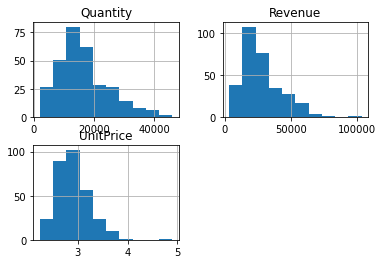

In [5]:
daily = df.groupby(['Date'], as_index=False).agg({'Quantity': 'sum', 'Revenue' : 'sum', 'UnitPrice' : 'mean'})
daily.hist()
plt.show()

In [6]:
def ihistogram(df, field, bins=None, title=''):
    fig = px.histogram(df, x=field, title=title, nbins=bins,
                       template='none').update(layout=dict(title=dict(x=0.5)))

    fig.update_yaxes(title_text='Number of Records')
    fig.update_traces(marker_color='lightskyblue',
                      marker_line_color='black', 
                      marker_line_width=1)

    fig.show()

In [7]:
l = ['Quantity', 'Revenue', 'UnitPrice']
@interact(display=l)

def viz(display):
    ihistogram(daily, display)
    

interactive(children=(Dropdown(description='display', options=('Quantity', 'Revenue', 'UnitPrice'), value='Qua…

### Create an interactive line chart where you can explore Quantity and Revenue by day (date) for each country. Include two dropdown widgets - one to choose between the Quantity and Revenue fields and the other to choose the Country.

In [8]:
daily = df.groupby(['Date', 'Country'], as_index=False).agg({'Quantity': 'sum', 'Revenue' : 'sum', 'UnitPrice' : 'mean'})
daily.head()

,Date,Country,Quantity,Revenue,UnitPrice
0,2010-12-01,Australia,107,358.25,5.278571
1,2010-12-01,EIRE,242,505.38,4.182000
2,2010-12-01,France,446,801.86,1.962632
3,2010-12-01,Germany,156,243.48,1.883571
4,2010-12-01,Netherlands,96,177.60,1.850000


In [9]:
def iline(df, x, y, groups=None, title=''):
    fig = px.line(df, x=x, y=y, color=groups, title=title, 
                  template='none')
    fig.show()

In [10]:
amount = ['Quantity', 'Revenue']
country = daily.Country.unique()
@interact(amount=amount, country=country)

def viz(amount,country):
    country_df = daily[daily.Country == country]
    iline(country_df, 'Date', amount, title=country)

interactive(children=(Dropdown(description='amount', options=('Quantity', 'Revenue'), value='Quantity'), Dropd…

### Create an interactive scatter plot showing the relationships between daily Quantity, UnitPrice, and Revenue for the United Kingdom. Include two dropdown boxes that let you choose between the 3 fields - one for the x axis and one for the y axis of your scatter plot. Size the data points according to Revenue.

In [11]:
def iscatter(df, x, y, color=None, size=None, title=''):
    fig = px.scatter(df, x=x, y=y, color=color, size=size, 
                     title=title, template='none')


    fig.update_traces(marker_line_color='black', 
                  marker_line_width=1)

    fig.show()

In [12]:
l = ['Quantity', 'Revenue', 'UnitPrice']
uk = daily[daily.Country == 'United Kingdom']
@interact(x=l, y=l)

def viz(x, y):
    iscatter(uk, x=x, y=y, size='Revenue')
    

interactive(children=(Dropdown(description='x', options=('Quantity', 'Revenue', 'UnitPrice'), value='Quantity'…

### Create a bar chart showing the top X products sold (by quantity) in the United Kingdom in a specific month. Use a dropdown box to select the month name and a slider to show the top X products. The range for X should be from 5 to 25. Make sure the bars are sorted in descending order according to their total quantity sold for the month.

Bonus points if you can figure out how to ensure that the month names in the dropdown appear in their correct order (January, February, March, April, etc.).

In [13]:
def ibarchart(df, x, y, order=None, title=''):
    plt.style.use(['dark_background'])
    fig = px.bar(df, x=x, y=y, title=title, template='none')

    fig.update_traces(marker_color='lightskyblue',
                      marker_line_color='black', 
                      marker_line_width=1)
    
    fig.update_layout(xaxis={'categoryorder':'array', 
                             'categoryarray': order})
    
    fig.show()

In [14]:
uk_products = df[df.Country == 'United Kingdom'].copy()
uk_products['Month'] = uk_products.InvoiceDate.dt.month
uk_products = uk_products[['Month', 'Description', 'Quantity']].groupby(['Month', 'Description']).agg({'Quantity':'sum'})
uk_products.loc[10].nlargest(10, 'Quantity')

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,8078
POPCORN HOLDER,4909
JUMBO BAG RED RETROSPOT,4724
PINK BLUE FELT CRAFT TRINKET BOX,4705
VICTORIAN GLASS HANGING T-LIGHT,3245
PAPER CHAIN KIT 50'S CHRISTMAS,3143
60 CAKE CASES VINTAGE CHRISTMAS,3030
CHRISTMAS PUDDING TRINKET POT,2726
RED HARMONICA IN BOX,2693


In [15]:
import datetime
l = uk_products.index.get_level_values('Month').unique().values
l = map(lambda x: (datetime.datetime.strptime(str(x), "%m"), x), l)
l = map(lambda x: (datetime.datetime.strftime(x[0], "%B"), x[1]), l)
l = list(l)
l

[('January', 1),
 ('February', 2),
 ('March', 3),
 ('April', 4),
 ('May', 5),
 ('June', 6),
 ('July', 7),
 ('August', 8),
 ('September', 9),
 ('October', 10),
 ('November', 11),
 ('December', 12)]

In [16]:
@interact(month=l, amount=(5,20))

def viz(month, amount):
    disp = uk_products.loc[month].nlargest(amount, 'Quantity')
    ibarchart(disp.reset_index(), "Description", 'Quantity')

interactive(children=(Dropdown(description='month', options=(('January', 1), ('February', 2), ('March', 3), ('…